# Stanford University Tuition Over Time Analysis

## Author: Ryley Traverse

This project looks at cost of tuition over time from 1985-2017 for Harvard University. It uses the undergraduate information from a Kaggle dataset available [here](https://www.kaggle.com/datasets/harvard-university/harvard-tuition). It has information about cost of room, board, health services, student fees, tuition, and overall total for each year in the 1985 to 2017 range. Understanding how the cost of higher education changes over time is important for making the decision of whether or not to attend and commit to paying off the total cost of tuition for a four year degree.

In [1]:
# Load necessary imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [11]:
# Load data
df = pd.read_csv('undergraduate_package.csv')
df.insert(loc=0, column='academic_year', value=df['academic.year'])
df = df.drop(['academic.year'], axis=1)
df.head()

,academic_year,component,cost
0,1985,Board,1925
1,1986,Board,1980
2,1987,Board,2035
3,1988,Board,2145
4,1989,Board,2145


In [13]:
# Set component and year lists
components = list(df.component.unique())
years = list(df.academic_year.unique())

## Plot Cost of Each Component Over Time

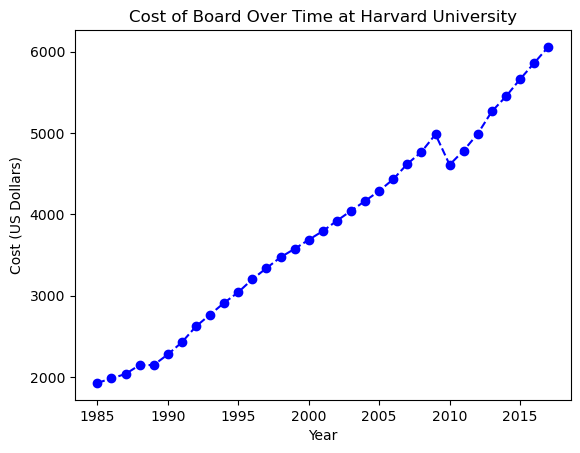

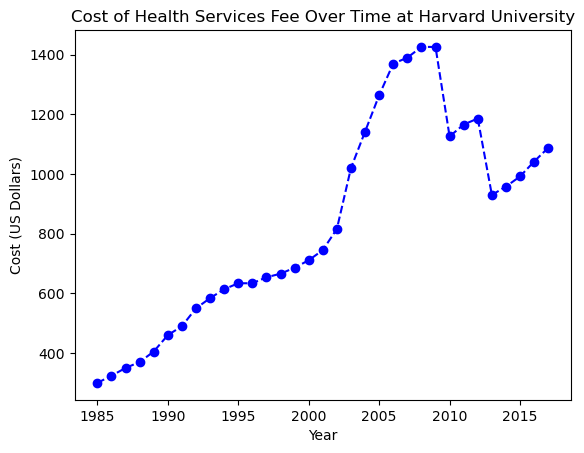

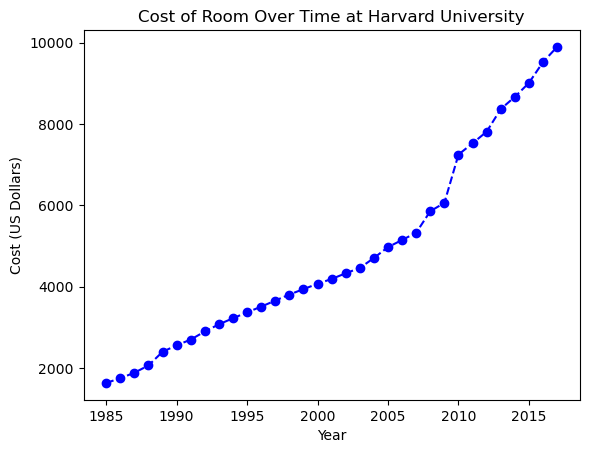

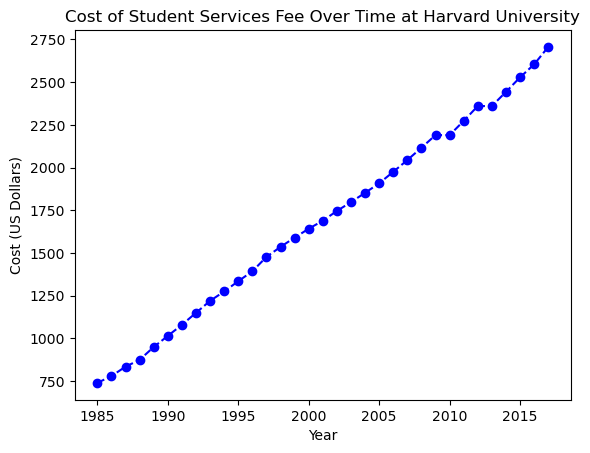

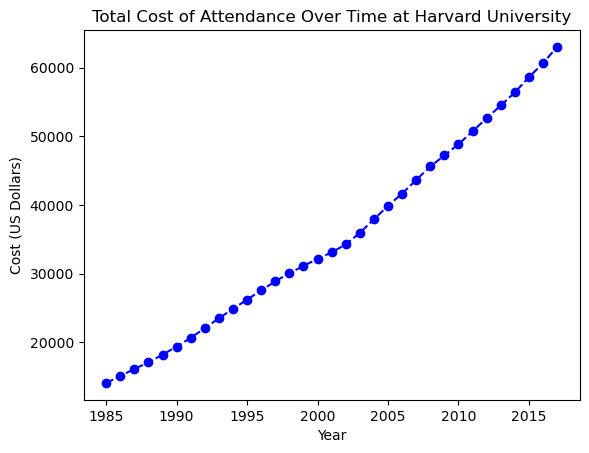

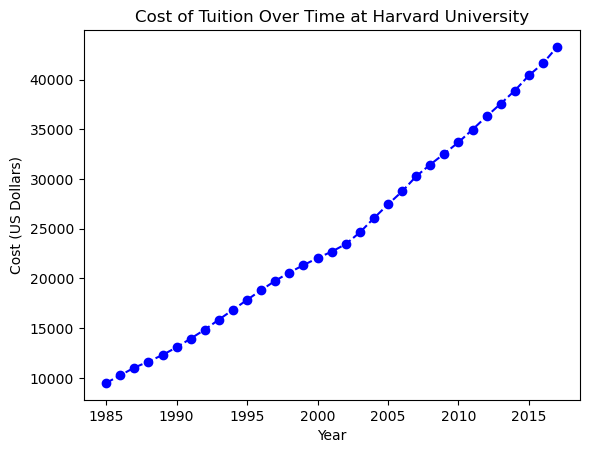

In [17]:
for c in components:
    df_temp = df[df['component']==c]
    plt.plot(years, df_temp['cost'], linestyle='--', marker='o', color='blue')
    plt.xlabel('Year')
    plt.ylabel('Cost (US Dollars)')
    if c == 'Total':
        t = 'Total Cost of Attendance Over Time at Harvard University'
    else:
        t = 'Cost of ' + c + ' Over Time at Harvard University'
    plt.title(t)
    plt.show()

In [29]:
df_tuition = df[df['component']=='Tuition']
df_tuition = df[df['component']=='Tuition']
X = np.array(years).reshape(-1, 1)
y = df_tuition['cost'].to_numpy()

def fit_model_show_results(poly_degree, X, y):
    # Set Prediction data values
    X_predict = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)
    y_predict = np.array([44990, 46340, 47730, 49653]).reshape(-1, 1)

    # Create polynomial features based on wanted degree
    poly_reg = PolynomialFeatures(degree=poly_degree)
    X_poly = poly_reg.fit_transform(X)
    X_predict_poly = poly_reg.transform(X_predict)

    # Initialize and fit regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    # Get predictions on train and validation set
    train_predictions = lin_reg.predict(X_poly)
    predictions = lin_reg.predict(X_predict_poly)

    # Calculate and print performance metrics
    mae_train = np.mean(abs(train_predictions-y))
    rmse_train= np.sqrt(np.mean(np.square(train_predictions-y)))
    mae_pred = np.mean(abs(predictions-y_predict))
    rmse_pred = np.sqrt(np.mean(np.square(predictions-y_predict)))
    print('Train Data Mean Absolute Error: ', str(mae_train))
    print('Train Data Root Mean Squared Error: ', str(rmse_train))
    print('Validation Data Mean Absolute Error: ', str(mae_pred))
    print('Validation Data Root Mean Squared Error: ', str(rmse_pred))

    # Plot data and predictions over time
    plt.plot(years, y, linestyle='--', marker='o', color='blue', label = 'Actual Cost of Tuition')
    plt.plot(years, train_predictions, linestyle='--', marker='o', color='cyan', label = 'Predicted Cost of Tuition')
    plt.plot(X_predict, y_predict, linestyle='--', marker='o', color='indigo', label = 'Actual Cost of Tuition (2018-2021)')
    plt.plot(X_predict, predictions, linestyle='--', marker='o', color='magenta', label = 'Predicted Cost of Tuition (2018-2021)')
    plt.xlabel('Year')
    plt.ylabel('Cost (US Dollars)')
    t = 'Cost of Tuition Over Time at Harvard University'
    plt.title(t)
    plt.legend()
    plt.show()

## Predictions for Polynomial Regression Model Degree 1

Train Data Mean Absolute Error:  837.0762167125658
Train Data Root Mean Squared Error:  1058.3701705766389
Validation Data Mean Absolute Error:  3501.3618538324954
Validation Data Root Mean Squared Error:  4043.824463863932


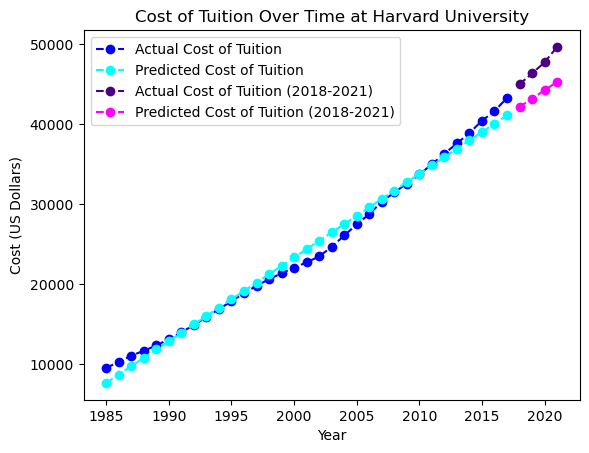

In [31]:
poly_degree = 1
fit_model_show_results(poly_degree, X, y)

## Predictions for Polynomial Regression Model Degree 2

Train Data Mean Absolute Error:  227.2953602872563
Train Data Root Mean Squared Error:  311.35438579575845
Validation Data Mean Absolute Error:  1980.4726787712425
Validation Data Root Mean Squared Error:  2432.5748291205045


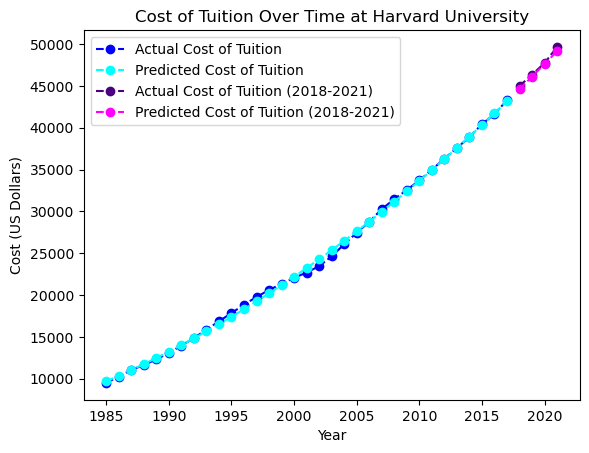

In [32]:
poly_degree = 2
fit_model_show_results(poly_degree, X, y)

## Predictions for Polynomial Regression Model Degree 3

Train Data Mean Absolute Error:  225.35040791106945
Train Data Root Mean Squared Error:  297.90066020794194
Validation Data Mean Absolute Error:  2023.3785183131695
Validation Data Root Mean Squared Error:  2510.019154634489


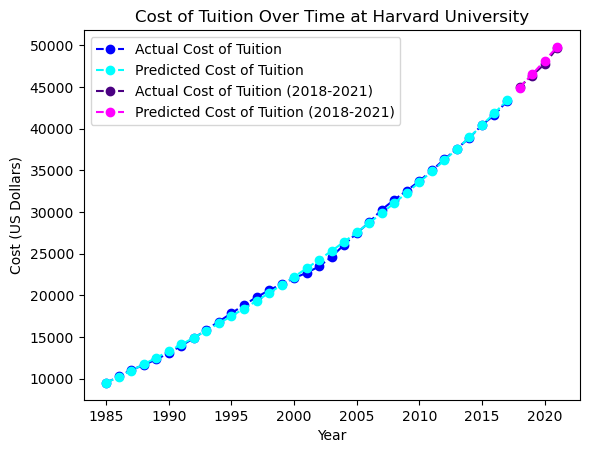

In [33]:
poly_degree = 3
fit_model_show_results(poly_degree, X, y)

## Summary of Results

From the above three models, we can see that a polynomial regression model of degree 2 seems to have the best accuracy for forcasting the next four years of tuition cost. The mean absolute error for predictions over the upcoming next four years is $1980. The mean absolute error for predictions on the training data set (1985-2017) is $227.